## Phase 1: Denoise

### 1.1 Gaussian Filter
### 1.2 K-means Clustering

In [2]:
%matplotlib inline
import scipy.ndimage.filters as flt
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn import cluster
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

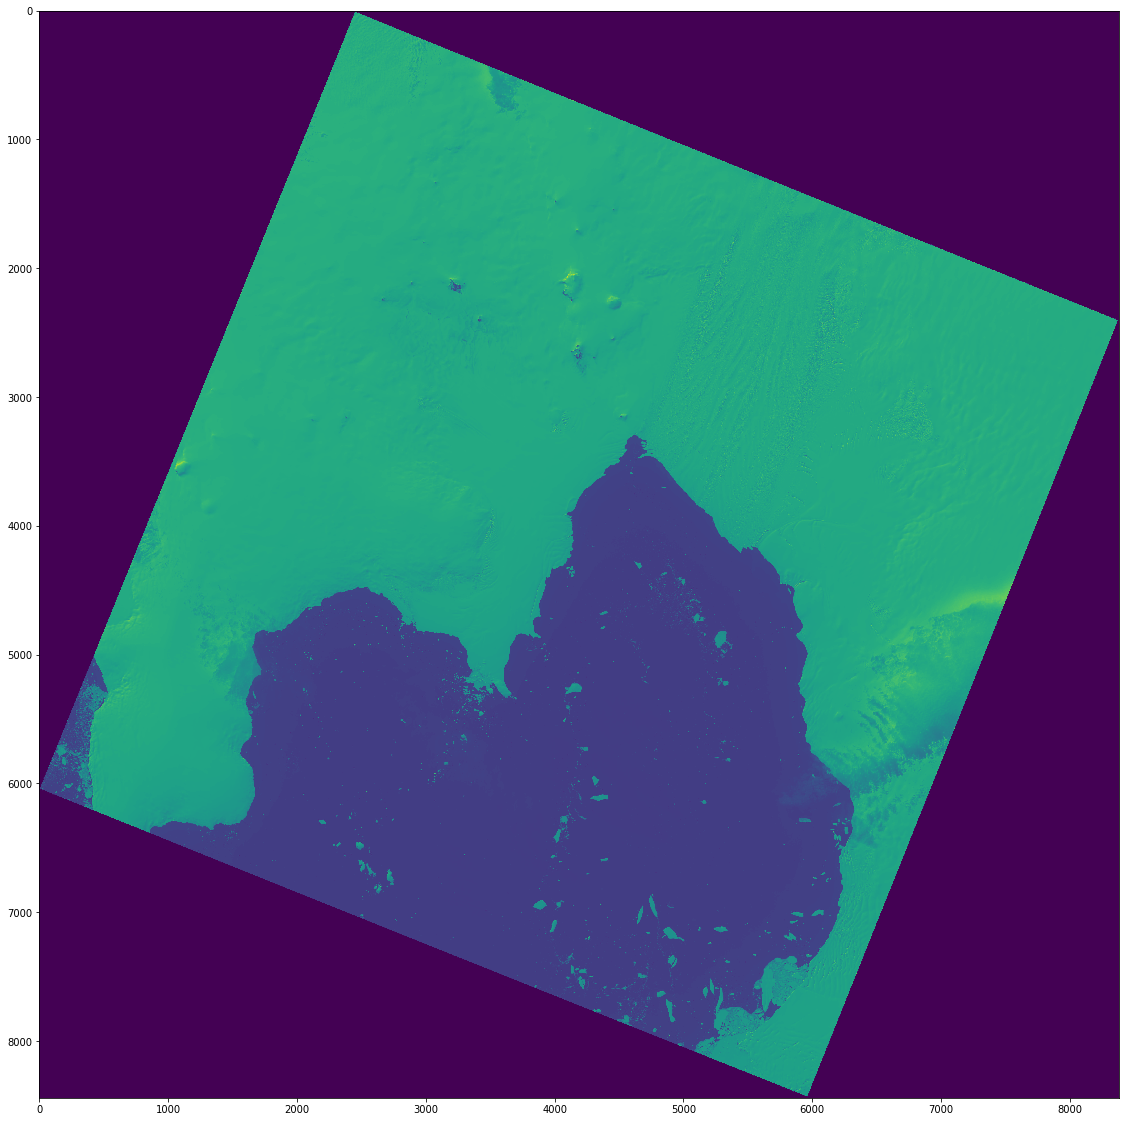

In [3]:
img= plt.imread("my.jpeg")
plt.figure(figsize = (20,20))
plt.imshow(img)

(array([2.9152921e+07, 1.2572321e+07, 1.1269860e+06, 1.0423200e+05,
        4.1891900e+05, 1.0076035e+07, 1.7229296e+07, 6.1731000e+04,
        1.5200000e+03, 6.0000000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

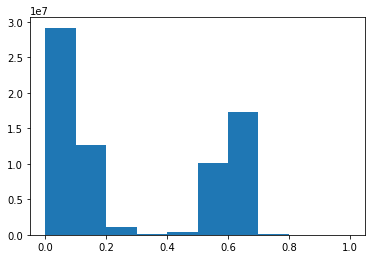

In [4]:
img = img/175
plt.hist(img.flat)

(array([2.9036865e+07, 8.8304000e+04, 1.3483114e+07, 3.1320500e+05,
        2.0654300e+05, 4.3649200e+05, 3.8767560e+06, 2.3162803e+07,
        1.3600600e+05, 3.9330000e+03]),
 array([0.        , 0.08320109, 0.16640219, 0.24960328, 0.33280437,
        0.41600546, 0.49920656, 0.58240765, 0.66560874, 0.74880983,
        0.83201093]),
 <a list of 10 Patch objects>)

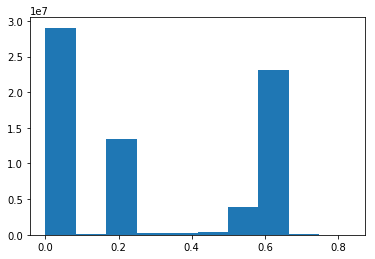

In [5]:
gimg=flt.gaussian_filter(img,5)
plt.hist(gimg.flat)

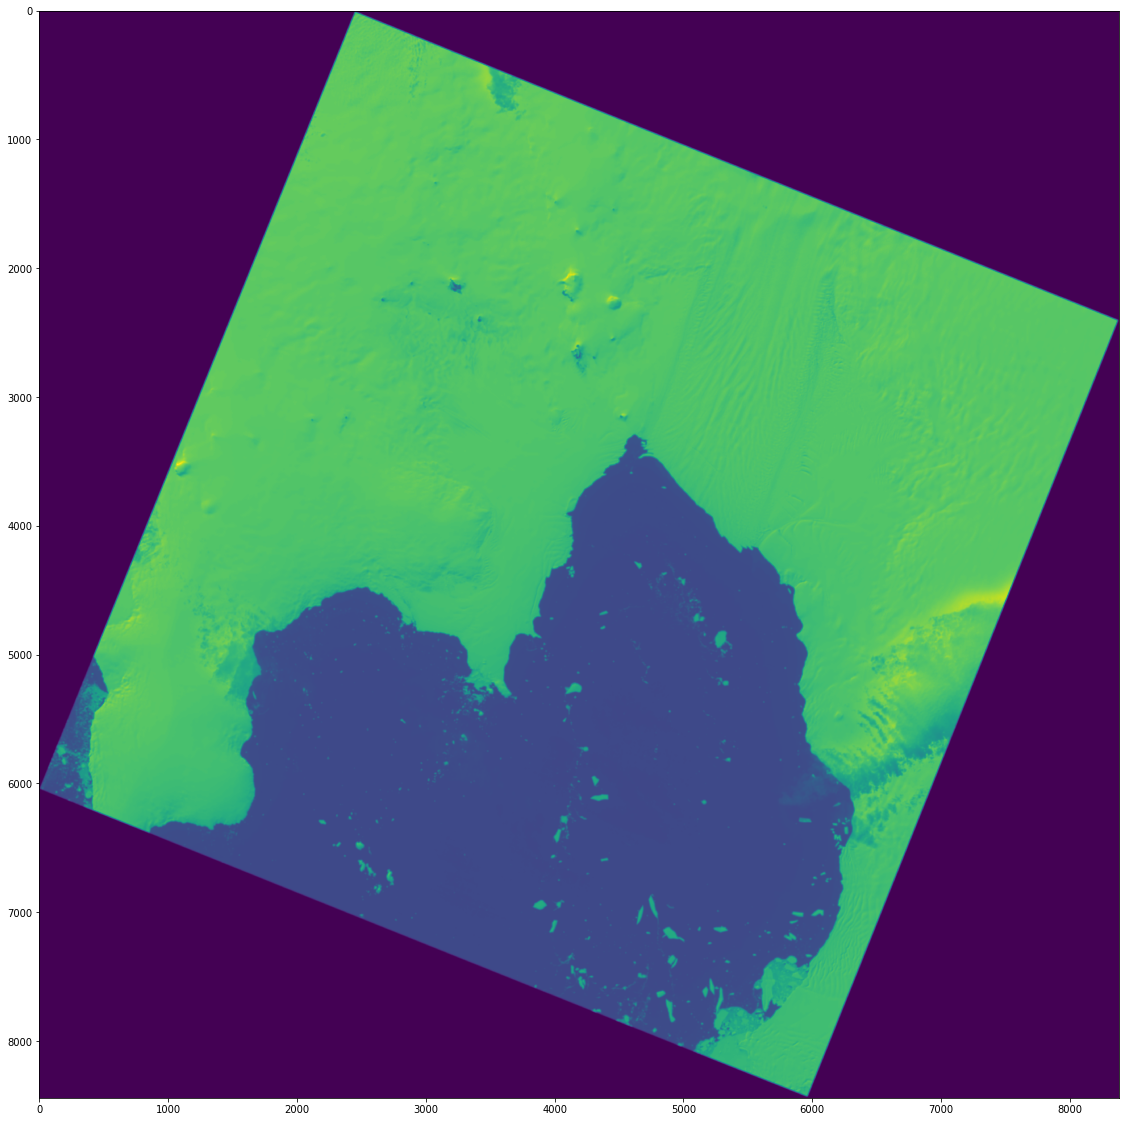

In [6]:
plt.figure(figsize = (20,20))
plt.imshow(gimg)

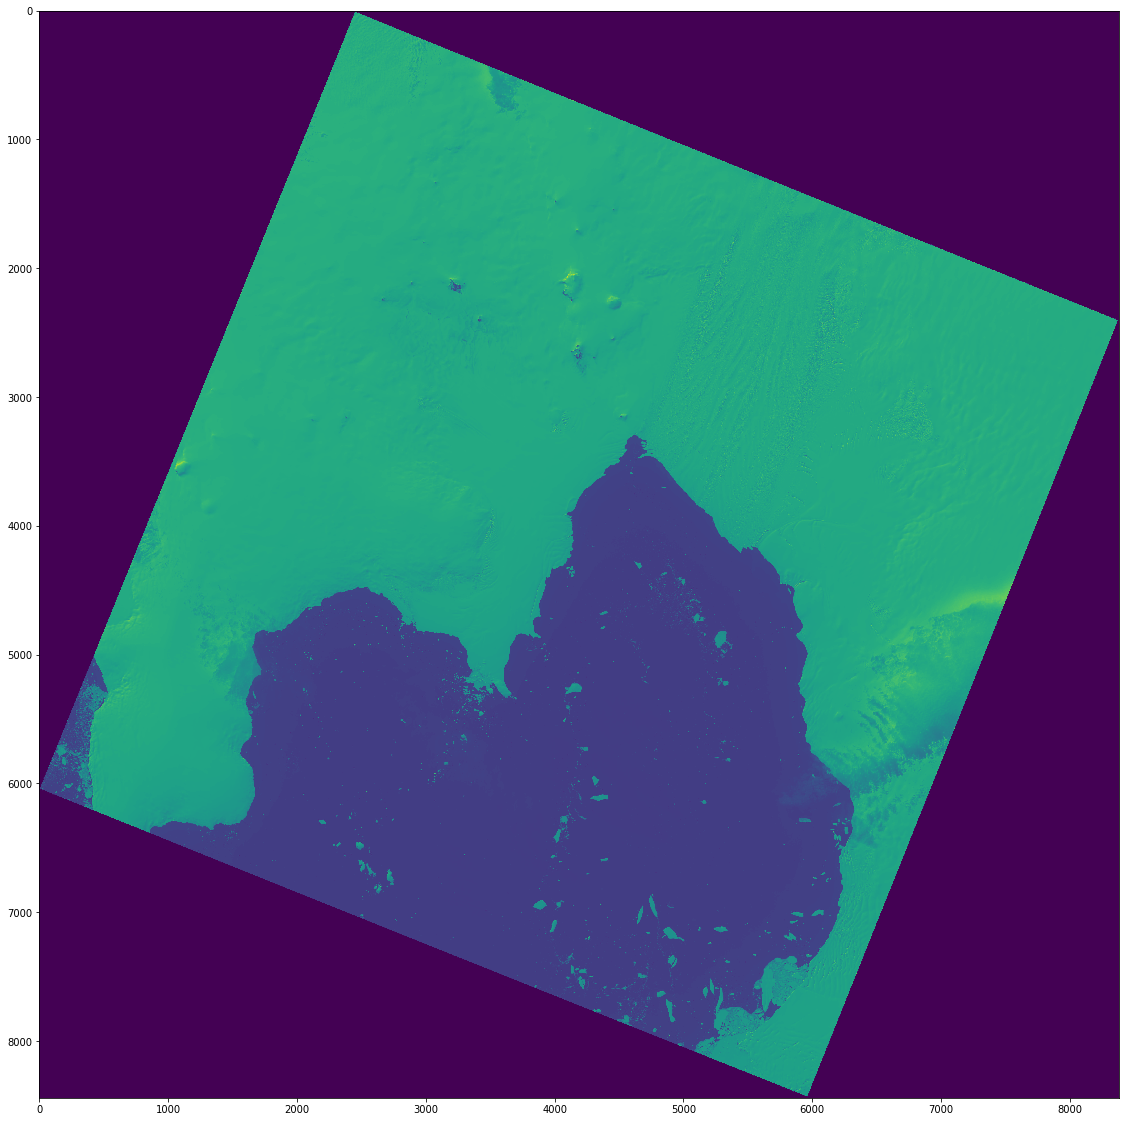

In [7]:
img2= plt.imread("my.jpeg")
plt.figure(figsize = (20,20))
plt.imshow(img2)

In [8]:
#Source: Instruments & Data Tools
#Inspired from the Vector Quantization Example
def km_clust(array, n_clusters):
    
    # Create a line array, the lazy way
    X = array.reshape((-1, 1))
    # Define the k-means clustering problem
    k_m = cluster.KMeans(n_clusters=n_clusters, n_init=4)
    # Solve the k-means clustering problem
    k_m.fit(X)

    # Get the coordinates of the clusters centres as a 1D array
    values = k_m.cluster_centers_.squeeze()

    # Get the label of each point
    labels = k_m.labels_

    return(values, labels)

<Figure size 432x288 with 0 Axes>

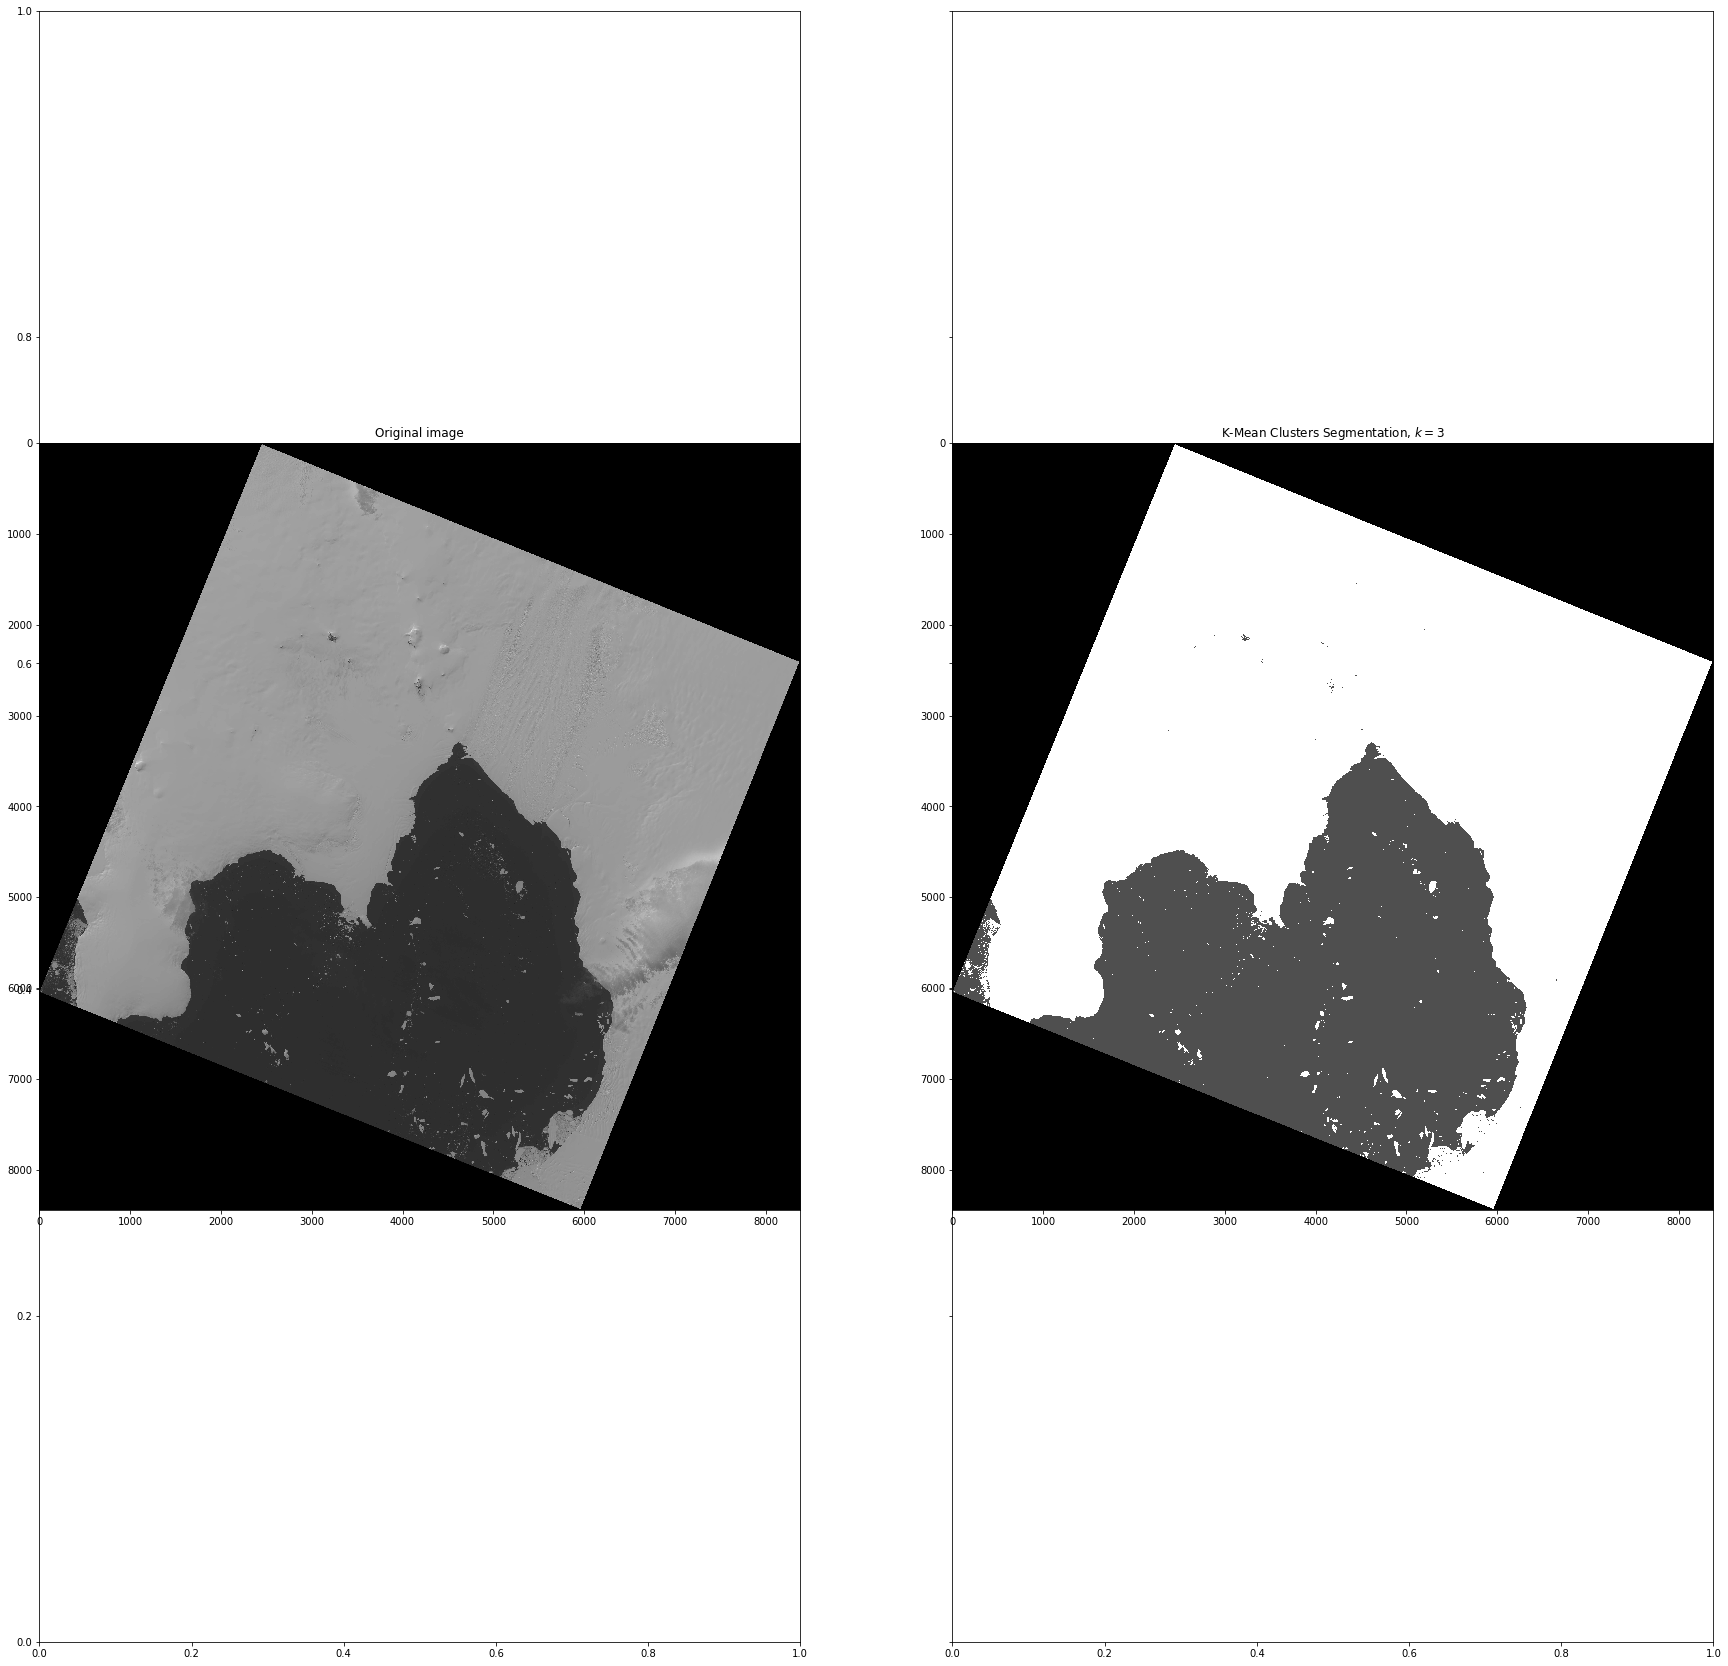

In [11]:
# Read the data as greyscale 
img = data.imread('my.jpeg',cmap='gray')

# Group similar grey levels using 8 clusters
values, labels = km_clust(img, n_clusters = 3)

# Create the segmented array from labels and values
img_segm = np.choose(labels, values)
# Reshape the array as the original image
img_segm.shape = img.shape

# Get the values of min and max intensity in the original image
vmin = img.min()
vmax = img.max()

fig = plt.figure(1)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(30, 30),
                                    sharex=True, sharey=True)


# Plot the original image
ax1 = fig.add_subplot(1,2,1)
#ax1.axis('off')
ax1.imshow(img,cmap=plt.cm.gray)#, vmin=vmin, vmax=vmax)
ax1.set_title('Original image')

# Plot the simplified color image
ax2 = fig.add_subplot(1,2,2)
#ax2.axis('off')
ax2.imshow(img_segm, cmap=plt.cm.gray)#, vmin=vmin, vmax=vmax)
ax2.set_title('K-Mean Clusters Segmentation, $k = 3$')



plt.savefig('side_by_side.jpeg', bbox_inches='tight')
plt.show()


<Figure size 432x288 with 0 Axes>

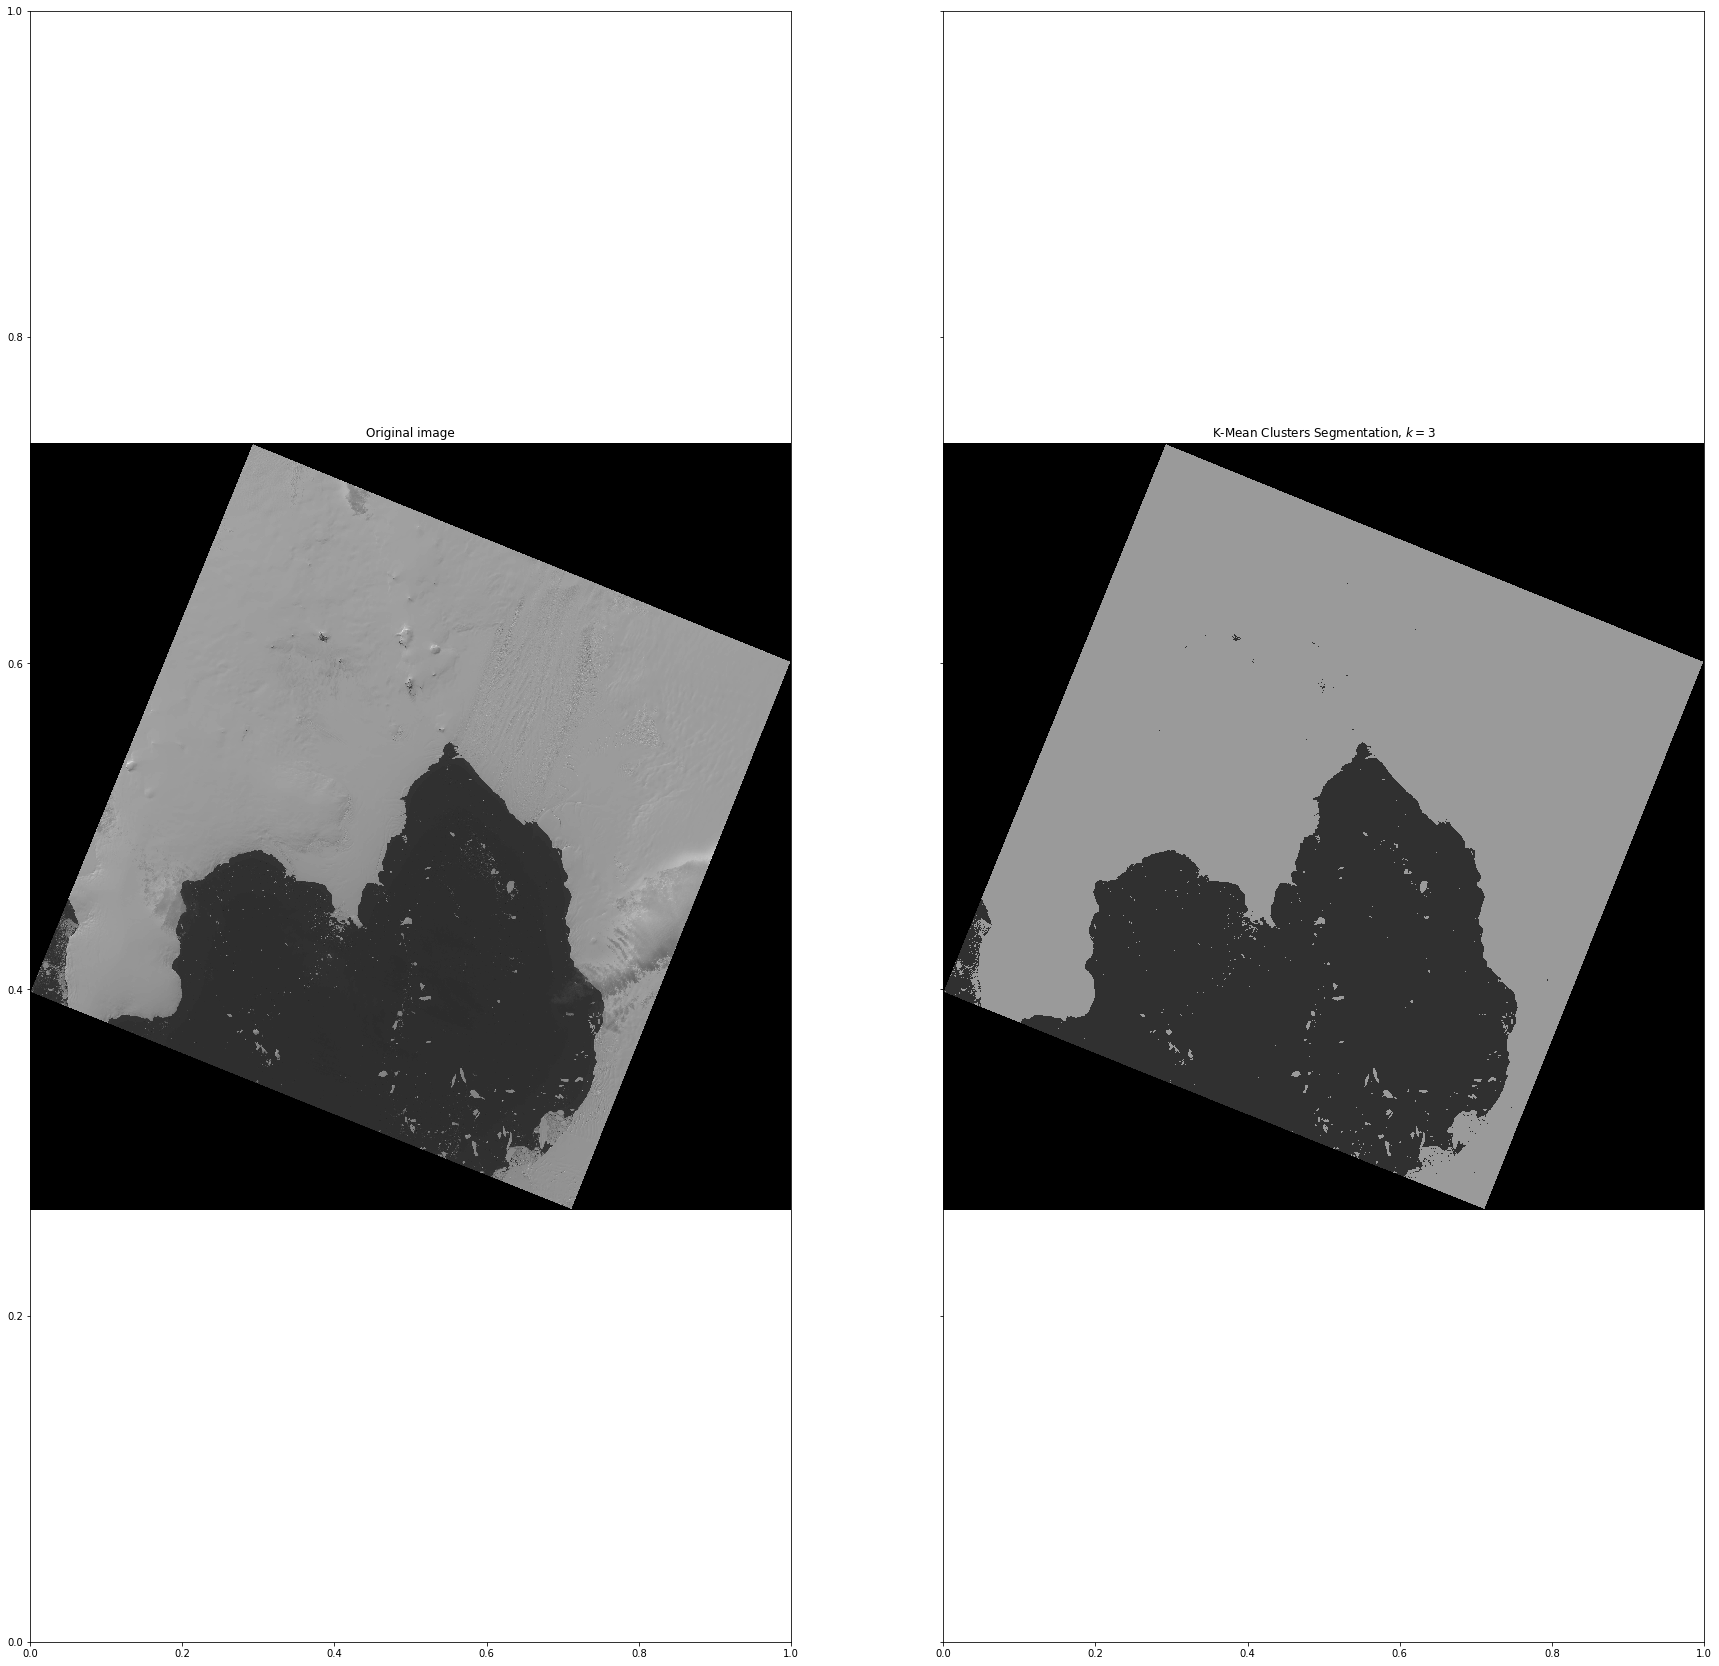

In [39]:
# Read the data as greyscale 
img = data.imread('my.jpeg',cmap='gray')

# Group similar grey levels using 8 clusters
values, labels = km_clust(img, n_clusters = 3)

# Create the segmented array from labels and values
img_segm = np.choose(labels, values)
# Reshape the array as the original image
img_segm.shape = img.shape

# Get the values of min and max intensity in the original image
vmin = img.min()
vmax = img.max()

fig = plt.figure(1)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(30, 30),
                                    sharex=True, sharey=True)


# Plot the original image
ax1 = fig.add_subplot(1,2,1)
ax1.axis('off')
ax1.imshow(img,cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
ax1.set_title('Original image')

# Plot the simplified color image
ax2 = fig.add_subplot(1,2,2)
ax2.axis('off')
ax2.imshow(img_segm, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
ax2.set_title('K-Mean Clusters Segmentation, $k = 3$')

# Get rid of the tick labels
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])

plt.savefig('side_by_side.jpeg')
plt.show()


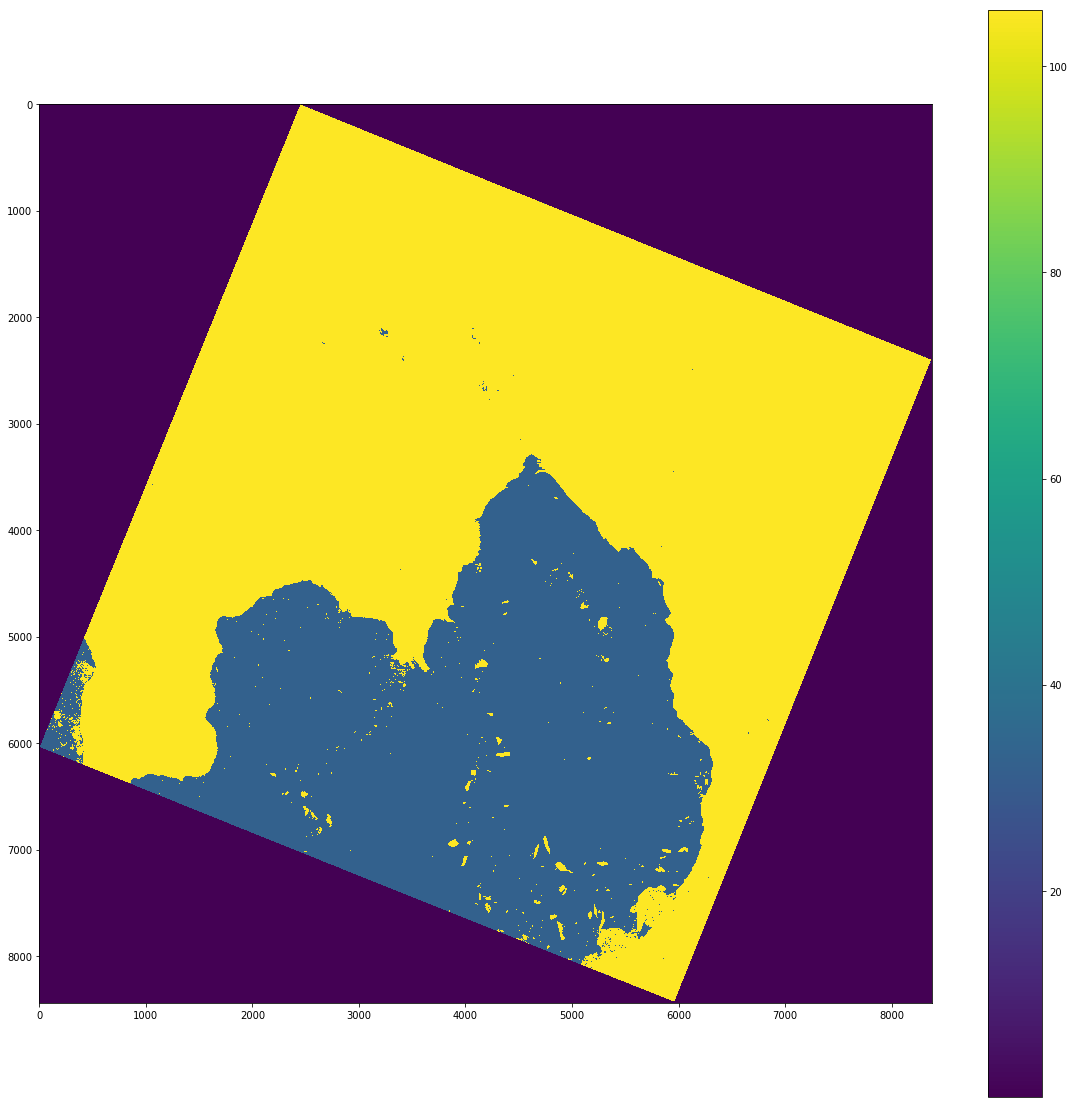

In [11]:
plt.figure(figsize = (20,20))
plt.imshow(img_segm)
plt.colorbar()